In [4]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install plotly
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [6]:
df = pd.read_csv('diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [7]:
df.tail(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0


In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
print(df.dtypes)

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object


In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os

In [11]:
df.isnull().sum()

Pregnancies                 1
Glucose                     3
BloodPressure               3
SkinThickness               2
Insulin                     3
BMI                         2
DiabetesPedigreeFunction    2
Age                         1
Outcome                     0
dtype: int64

In [12]:
data=df.dropna()

In [13]:
corr_= data.corr()
corr_

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.122122,0.136548,-0.082938,-0.078175,0.013577,-0.043016,0.549952,0.222510
Glucose,0.122122,1.000000,0.145682,0.052928,0.332428,0.210252,0.131340,0.264125,0.460428
BloodPressure,0.136548,0.145682,1.000000,0.207275,0.086770,0.266476,0.035187,0.239157,0.059250
SkinThickness,-0.082938,0.052928,0.207275,1.000000,0.433576,0.396328,0.181200,-0.109012,0.073583
Insulin,-0.078175,0.332428,0.086770,0.433576,1.000000,0.200413,0.179690,-0.043623,0.129168
BMI,0.013577,0.210252,0.266476,0.396328,0.200413,1.000000,0.139265,0.027953,0.289080
DiabetesPedigreeFunction,-0.043016,0.131340,0.035187,0.181200,0.179690,0.139265,1.000000,0.024935,0.174895
Age,0.549952,0.264125,0.239157,-0.109012,-0.043623,0.027953,0.024935,1.000000,0.240974
Outcome,0.222510,0.460428,0.059250,0.073583,0.129168,0.289080,0.174895,0.240974,1.000000


<Axes: >

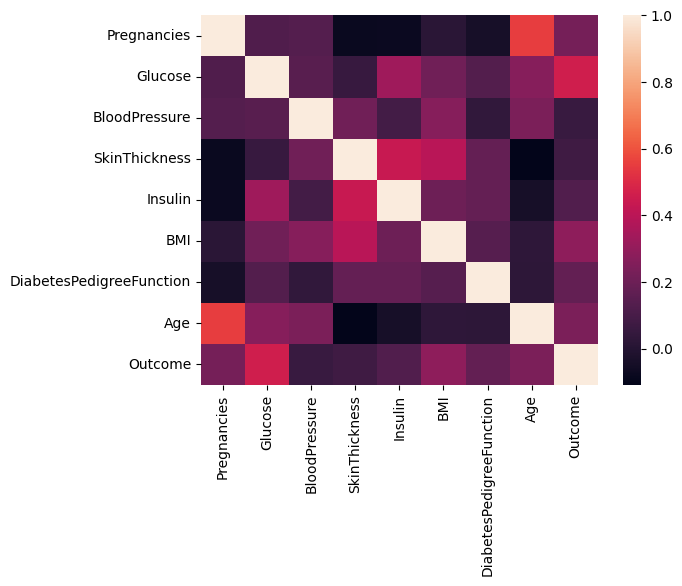

In [14]:
sns.heatmap(corr_)

In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,3.850866,120.880160,69.181092,20.671105,80.739015,31.971505,0.472840,33.219707,0.351531
std,3.365966,31.916249,19.367649,15.922804,115.977405,7.781307,0.332191,11.731709,0.477767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.376000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,129.500000,36.500000,0.628000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
X= data.drop(columns=['Outcome'])
X=X.values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [17]:
X[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ])

In [18]:
Y= data['Outcome'].values
Y

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,

In [19]:
permutation =np.random.permutation(len(Y))

train_set = np.floor(len(Y)*0.8).astype(int)
test_set=np.floor(len(Y)*0.2).astype(int)

X_train =X[permutation[:train_set], 1:2]
Y_train =Y[permutation[:train_set]]
X_train


array([[115.],
       [117.],
       [136.],
       [ 90.],
       [138.],
       [ 97.],
       [105.],
       [123.],
       [ 90.],
       [118.],
       [145.],
       [125.],
       [131.],
       [170.],
       [128.],
       [ 96.],
       [122.],
       [ 57.],
       [ 95.],
       [101.],
       [126.],
       [183.],
       [197.],
       [124.],
       [161.],
       [167.],
       [125.],
       [119.],
       [ 93.],
       [109.],
       [ 73.],
       [179.],
       [114.],
       [ 99.],
       [135.],
       [100.],
       [109.],
       [119.],
       [ 85.],
       [147.],
       [124.],
       [101.],
       [100.],
       [ 99.],
       [ 90.],
       [105.],
       [106.],
       [ 90.],
       [ 85.],
       [112.],
       [ 89.],
       [146.],
       [142.],
       [141.],
       [107.],
       [103.],
       [ 81.],
       [107.],
       [105.],
       [136.],
       [ 84.],
       [137.],
       [137.],
       [114.],
       [120.],
       [122.],
       [ 8

In [20]:
def make_splits(X,Y):
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    X_train,Y_train, X_test, Y_test = sk.model_selection.train_test_split(X,Y, test_size=0.15)
    return X_train,Y_train, X_test, Y_test

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Text(0, 0.5, 'Outcome')

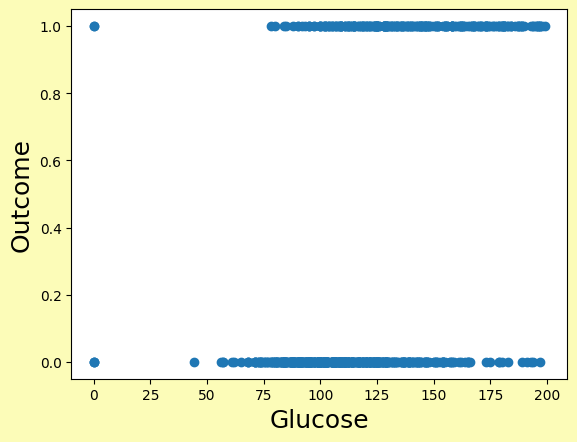

In [41]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['Glucose'],data['Outcome'])
plt.xlabel('Glucose', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

Text(0, 0.5, 'Outcome')

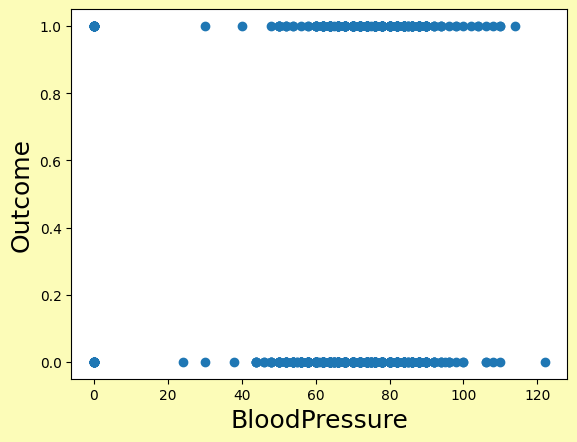

In [48]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['BloodPressure'],data['Outcome'])
plt.xlabel('BloodPressure', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

Text(0, 0.5, 'Outcome')

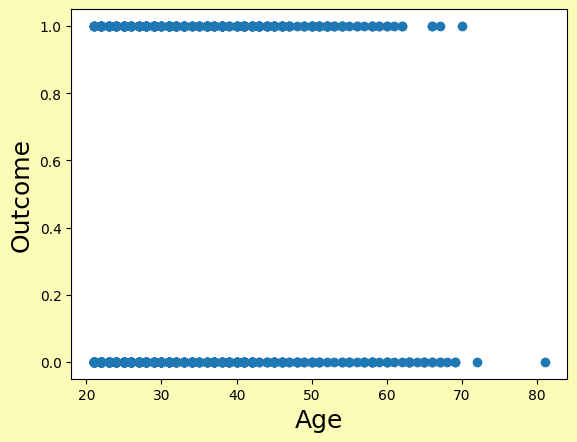

In [49]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['Age'],data['Outcome'])
plt.xlabel('Age', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

Text(0, 0.5, 'Outcome')

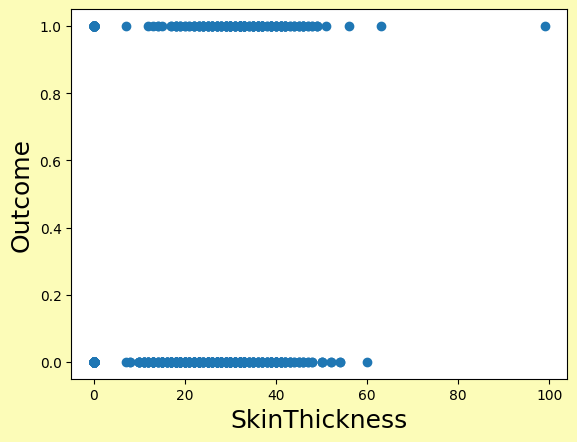

In [50]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['SkinThickness'],data['Outcome'])
plt.xlabel('SkinThickness', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

Text(0, 0.5, 'Outcome')

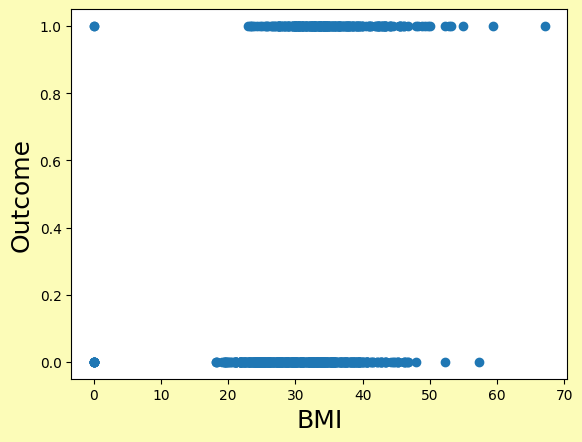

In [51]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['BMI'],data['Outcome'])
plt.xlabel('BMI', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

Text(0, 0.5, 'Outcome')

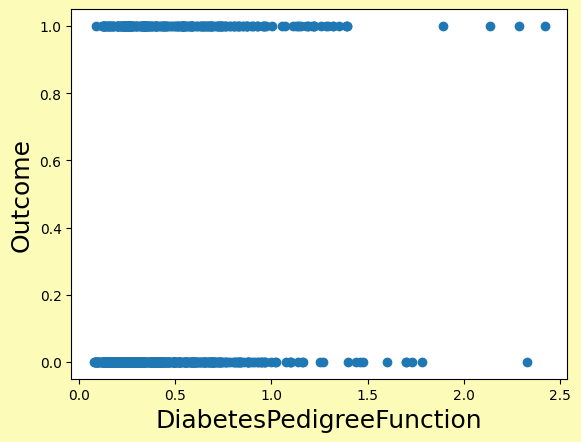

In [53]:
plt.figure(facecolor='#fcfcb8')
plt.scatter(data['DiabetesPedigreeFunction'],data['Outcome'])
plt.xlabel('DiabetesPedigreeFunction', fontsize=18)
plt.ylabel('Outcome', fontsize=18)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [26]:
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [29]:
plt.figure(figsize=(13, 8),facecolor='#fcfcb8')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Reality', fontsize=18)
plt.title('Conclusion', fontsize=22, color='#992d1a',weight='bold')
plt.show()

NameError: name 'y_test' is not defined

<Figure size 1300x800 with 0 Axes>